Accuracy score  0.6907216494845361


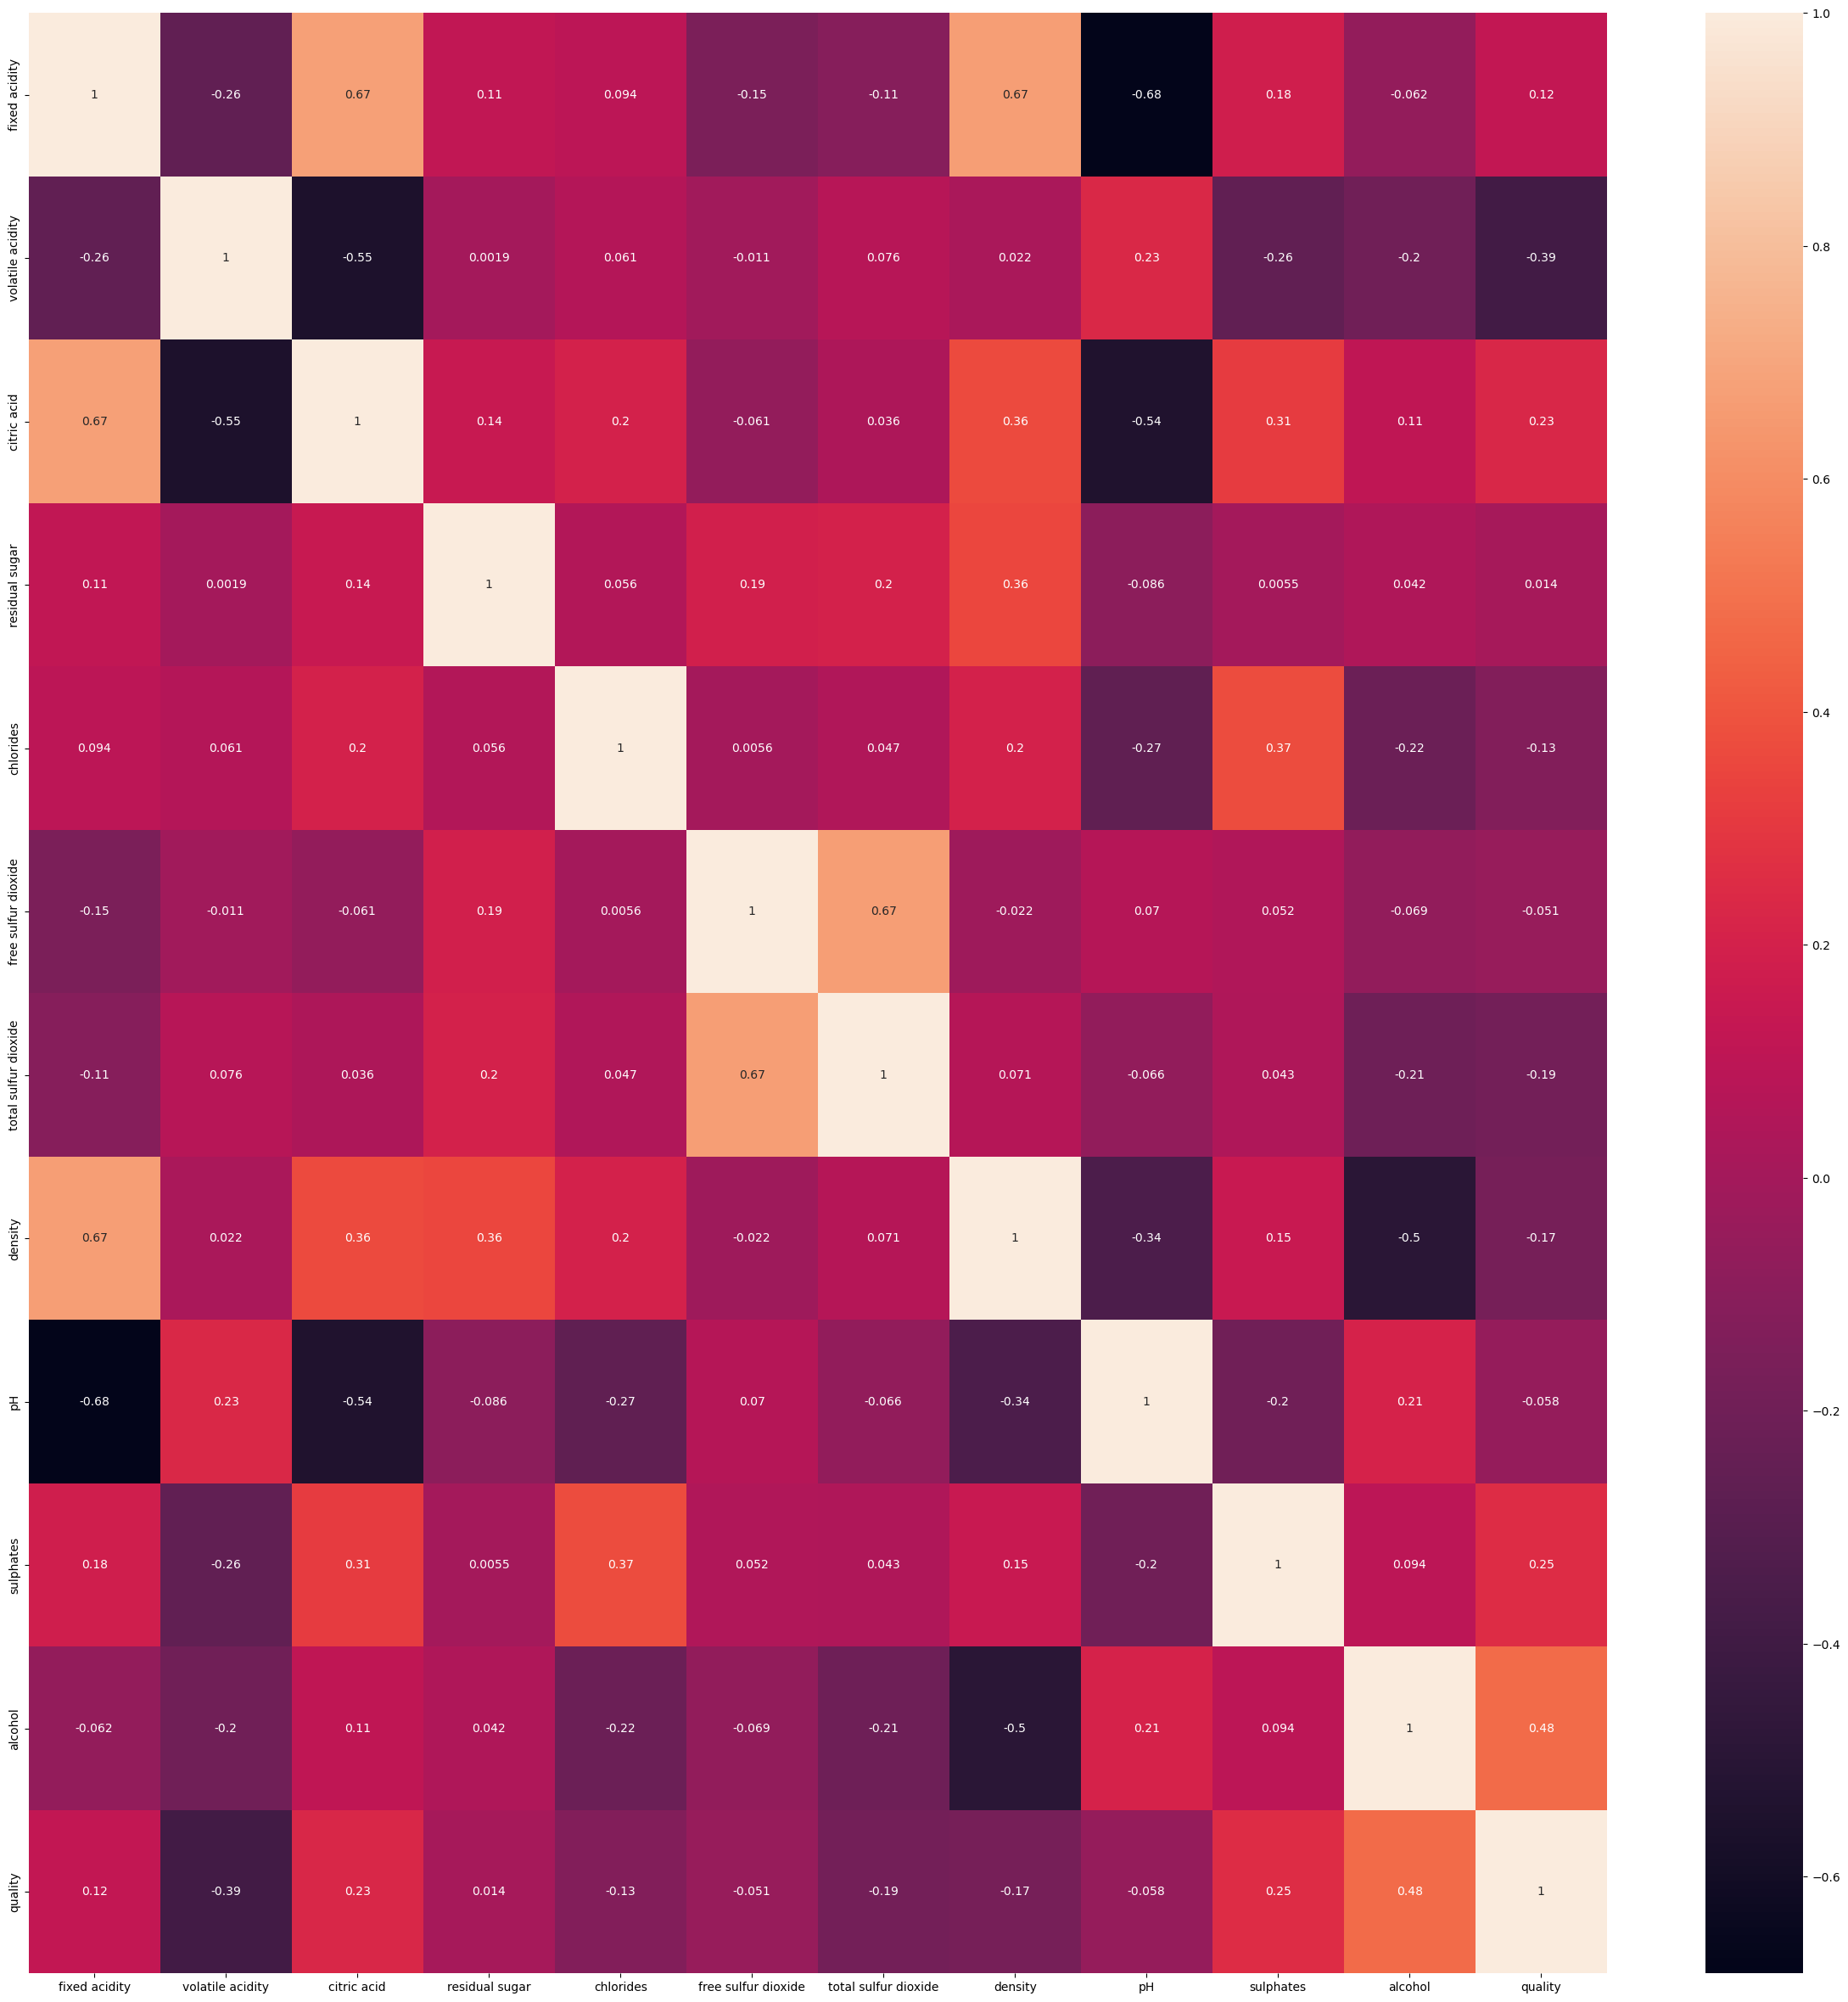

In [1]:
#Import the Required Libraries
import numpy as np
import pandas as pd #Data into Structure
import matplotlib.pyplot as plt
import seaborn as sns

#Reading of the File of given Datset
data = pd.read_csv('winequality-red.csv')

#Coorelation Matrix among all features inside the dataset
plt.figure(figsize=(30,30))
corr = data.corr()
sns.heatmap(corr,annot = True)

#Detection of the Outliers using Z-Score
from scipy import stats
z= np.abs(stats.zscore(data))

#Remove those records whose z>3 (Outlier)
new_data = data[(z<3).all(axis=1)]

#Data Spliting into feature(X) and Target column(Y)
from sklearn.model_selection import train_test_split #For Spliting the data into Train and Test
x = new_data.drop(columns = 'quality')
y = new_data['quality']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Data Modeling using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classificationModel = RandomForestClassifier(n_estimators=100)
rf_classificationModel.fit(x_train,y_train)

#Prediction of data using Random Forest Model
y_pred = rf_classificationModel.predict(x_test)

#Data Evaluation on Metrics
from sklearn import metrics
print('Accuracy score ', metrics.accuracy_score(y_test,y_pred))